In [5]:
import numpy as np
from scipy.stats import norm
from scipy import stats
from ROOT import TCanvas, TGraph, TH1F, TF1

import matplotlib.pyplot as plt
%matplotlib inline 

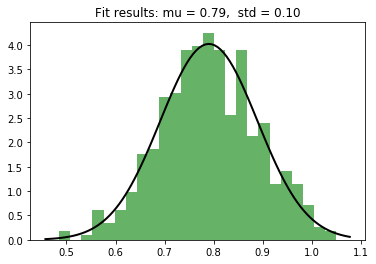

In [24]:
# Generate some data for this demonstration.
data = norm.rvs(.8, .1, size=500)

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

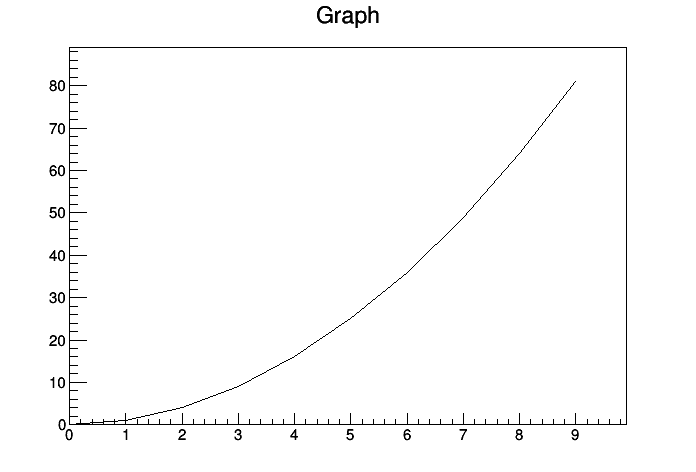

In [25]:
## Plotting with Root ##
# http://www.erikfrojdh.com/python/plot-and-fit-in-root-unsing-pyroot-and-then-back-to-python/
    
#Some data
x = np.arange(10)
y = x**2

#Canvas to plot on and graph
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

#Draw canvas and graph
c.Draw()
g.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: test (Potential memory leak).


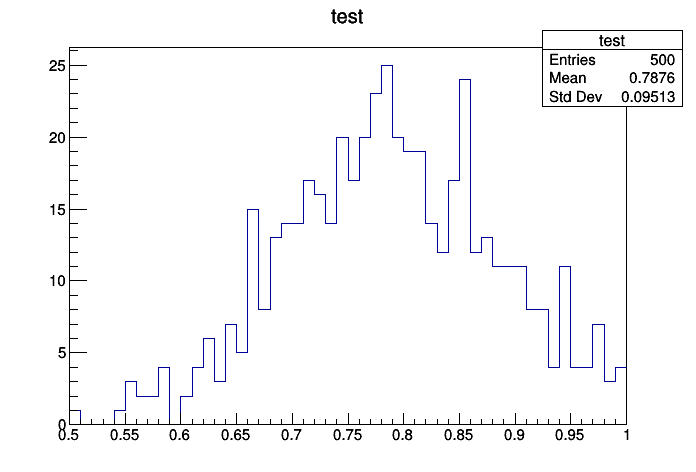

In [41]:
test = TH1F('test', 'test', 50, .5,1.)
for i in range(len(data)):
    test.Fill(data[i].astype(np.double))
c1 = TCanvas()
c1.Draw()
test.Draw()

In [79]:
fit = test.Fit('gaus','SR')

 FCN=29.0363 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.11684e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.91036e+01   1.18567e+00   2.37570e-03   1.07018e-04
   2  Mean         7.89955e-01   5.09486e-03   1.34242e-05   1.12282e-02
   3  Sigma        9.95264e-02   4.82934e-03   3.29347e-05   1.04685e-02


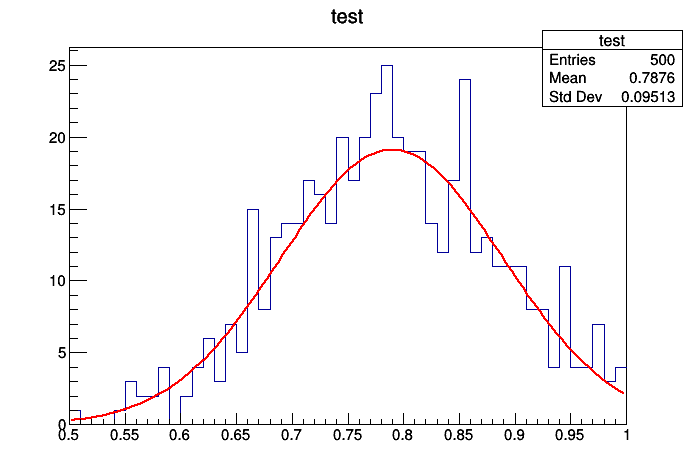

In [56]:
c2 = TCanvas()
c2.Draw()
test.Draw()

In [84]:
fit_par = [fit.Parameters()[i] for i in range( 3 )]
print fit_par

[19.1036063346587, 0.7899549984256626, 0.0995263808853247]


In [81]:
f = fit.GetChisquare()

AttributeError: 'TFitResult' object has no attribute 'GetChisquare'